# Module 8 Project: ETL and Analysis

**Laine Beatty**

# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project explores three primary methods of time series analysis while using MySQL queries in Python scripts. The following sections provide an overview and description of the ETL (Extract, Transform and Load) process to ingest data from a raw format into a database in MySQL Workbench. The ETL process is followed by queries demonstrating the use of time series trend analysis, percentage changes and rolling time windows.


[Back to top](#Index)


## 1. Introduction

The Extract-Transform-Load section describes the key steps and process to ingest data from a raw format into a database in MySQL Workbench. The Monthly Retail Trade Survey (MRTS) dataset is initially provided in an Excel file with each year separated into individual worksheets, with columns for each month of the year and rows for each industry category. This section describes the process of using Python to create installation scripts to create and populate the database in MySQL Workbench.

The Analysis and Visualization section describes the process and provides the Python scripts used to query the MRTS database created during the ETL process. The trend queries and plots are used to compare monthly and annual trends in total retail and food sales, then to compare monthly and annual trends in bookstores, sporting goods stores, and hobbies, toys and games stores. The percentage change queries and plots are used to compare overall trends in industries with different baseline amounts, such as women's and men's clothing stores. The rolling time windows queris and plots are used to compare moving averages between new car dealers, used car dealers, and gas stations.


[Back to top](#Index)

## 2. Extract-Transform-Load


[Back to top](#Index)

### 2.1 The ETL Process

The key steps to perform ETL on the provided Monthly Retail Trade Survey (MRTS) dataset include:  
* Transforming the Excel data to a format that is readable in Python and SQL
* Loading the data in Python
* Compiling the SQL installation script
* Running the installation script to create and populate the relevant tables
* Running queries to test that the completeness and correctness of the resulting database

[Back to top](#Index)

### 2.2 Data Exploration

The MRTS dataset includes 29 full years of data, from January 1992 through December 2020, and two months of data in January and February 2021. In total, the dataset contains 350 months of data for 65 unadjusted industry sales categories and 38 adjusted industry sales categories. For the purposes of this project, only the unadjusted categories were considered. All sales totals are reported in millions of U.S. dollars.  

A number of industry categories include null values due to concerns about the estimates' quality. These concerns resulted from high sampling variability or poor response quality. Null values represented by "(NA)" were not available, and null values represented by "(S)" were excluded due to estimate quality concerns.

[Back to top](#Index)

### 2.3 Data Preparation

The modifications prior to loading the dataset in Python included the creation of abbreviated industry field names. The dataset was ingested using the Pandas `read_excel()` function to replace the strings representing null values with `np.nan` and to replace the industry descriptions with the abbreviated field names. In Python, the data was transposed to create a time series dataset with one row per month, and a data frame column was added to represent the monthly `datetime` value.


The following code was used to create the schema for the Descriptions table to store the abbreviated field names.

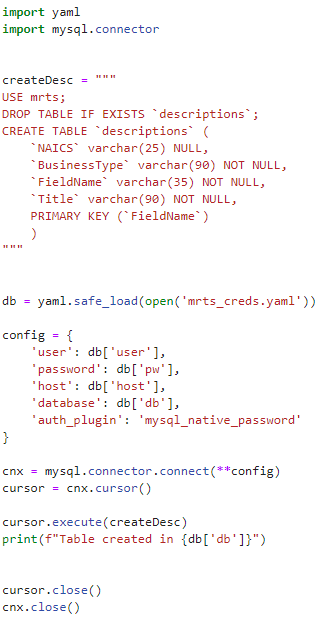

The following code was used to create the schema for the MRTS data table.

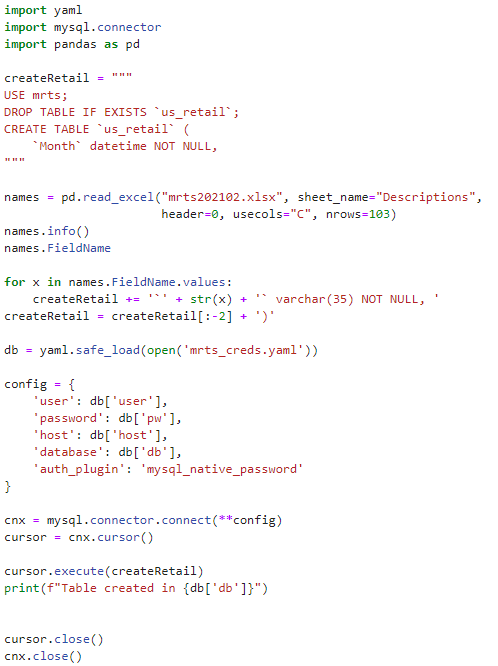

[Back to top](#Index)

### 2.4 Read the Data Using Python

In order to read data from a CSV in Python, users can apply the Pandas `read_csv()` function or the file parser from the `csv` Python library. Both functions are able to replace null or empty values and to apply various delimiters. However, the Pandas `read_csv()` function is generally used to load a dataset into a Pandas series or data frame, while the `csv` library is more useful for looping through rows of CSV data.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

While the sales data was ingested with `read_excel()` to use data frame capabilities for data transformation, the abbreviated column names were ingested from a CSV export. Using a loop, each row of CSV data was added to a list of tuples, with one tuple representing each row. After the full list was compiled, `cursor.executemany()` from the `mysql.connector` library was used to enter the tuple values in a SQL insert statement to populate the Description database.

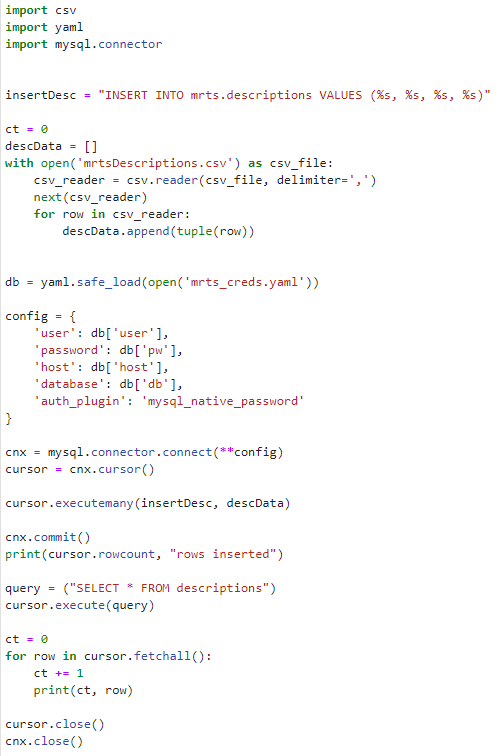

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

In order to use the Pandas capabilities to reformat the MRTS Excel data into a single, transposed table, the MRTS data was read into Python with the Pandas `read_excel()` function.

First, the field names were obtained from a manually created list on the "Descriptions" worksheet. An additional field was added for the monthly dates. A Pandas data frame was populated with the field names and reformatted monthly dates.

A loop was used to obtain each column of monthly data and transpose it into the rows of the Pandas data frame.

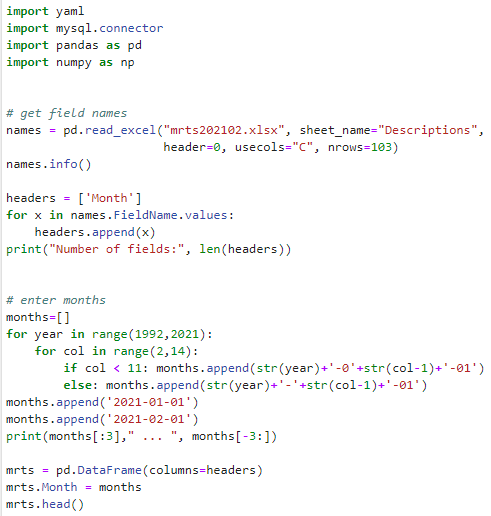

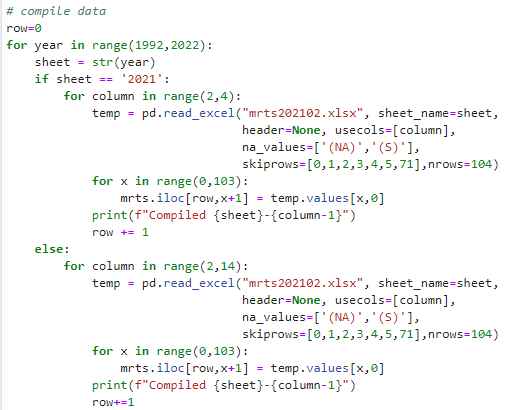

[Back to top](#Index)

### 2.5 Writing an Installation Script

After compiling the Excel data into the Pandas data frame, `mysql.connector` was used to populate the `us_retail` table in MySQL Workbench. A loop was used to compile a SQL insert statement string for each row of data, and the `string.replace()` method was used to replace `np.nan` values with an empty string.

After committing the changes to the MySQL database, a test query was executed to check that the data had been inserted and committed.

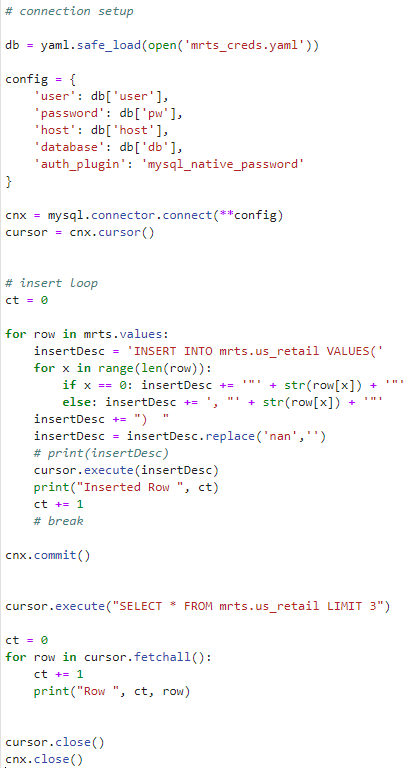


[Back to top](#Index)

## 3. Analysis and Visualization

Running queries against the dataset in MySQL Workbench is more efficient, with a direct connection maintained to the database and simpler syntax that does not require additional statements to commit changes. However, running queries against the dataset in Python provides the ability to access powerful data cleaning and manipulation tools, such as the NumPy and Pandas libraries, as well as plot generation in Matplotlib or Seaborn. Once a Python script has been completed and saved, these queries are also easy to repeat from a command line shell.

[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

Two queries were run against the MRTS dataset in MySQL Workbench to obtain a list of annual totals and the final row count. The annual totals were compared to the original MRTS Excel file to ensure the data was complete and correct. The final row count was compared to the number of months included in the MRTS Excel file to ensure all years were included in the final database.

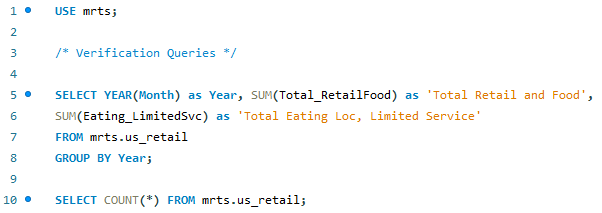

[Back to top](#Index)

### 3.2 Running Queries From Python

After verifying that the queries obtained the correct summary information in MySQL Workbench, the queries were inserted in a Python script and run from a terminal in Visual Studio Code.

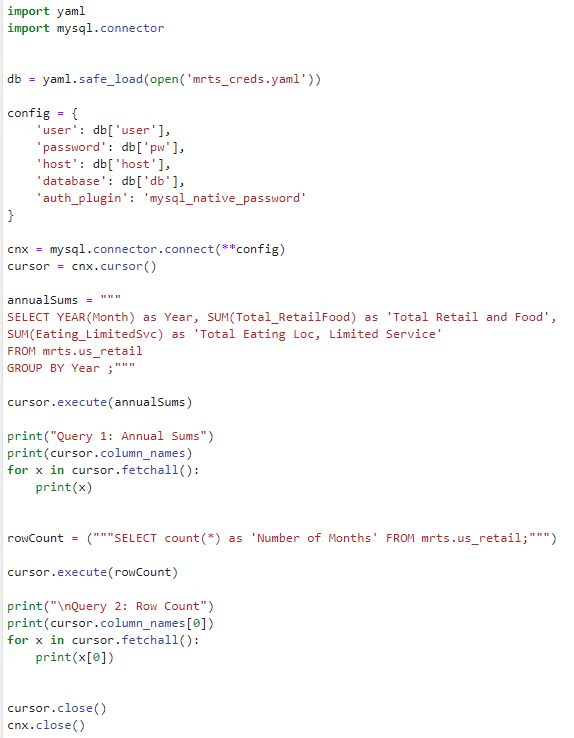

[Back to top](#Index)

### 3.3 Explore Trends

Time series data consists of three primary components:
* the trend, or "long term direction"
* seasonality, or "systematic, calendar related movements"
* irregularity, or "unsystematic, short term fluctuations.

Trend analysis is used to identify the movement in the data due to long term underlying factors such as population growth, inflation, etc.

Two queries were run against the MRTS dataset in Python to obtain monthly and annual sales for total retail and food sales. The Pandas library was used to convert the data to the correct data types, and the annual and monthly sales were plotted in Matplotlib for visual analysis of trends in the data.

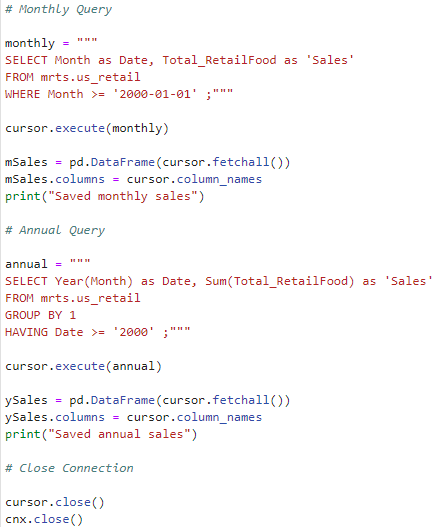  
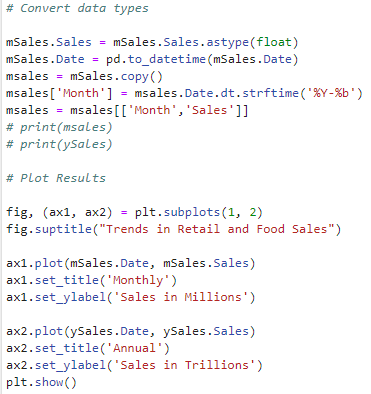

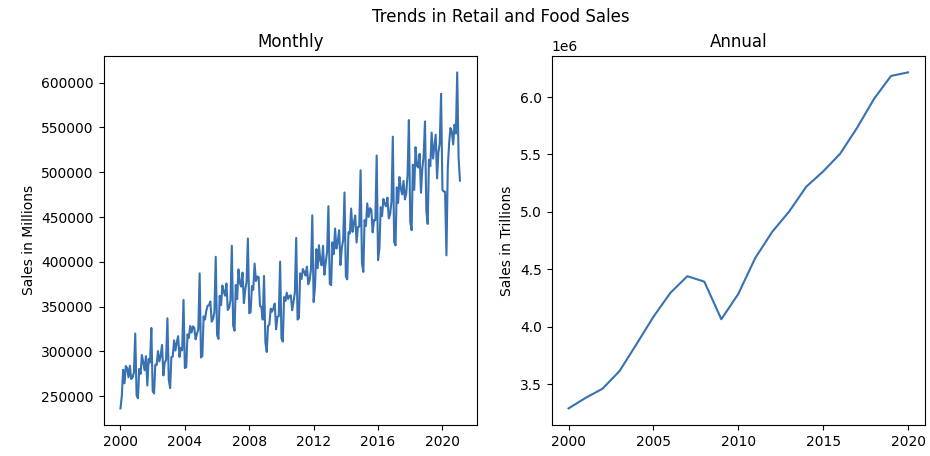

The retail and food service categories show a distinct upward trend from 2000 through 2019, with a sharp drop around 2007 through 2008. While the general upward trend is visible in the monthly plot, it is harder to distinguish due to the seasonal fluctuations. The growth in sales also levels off in 2020. The overall trend is much clearer in the annual plot, with clearly visible impacts of national and global events.

Additional queries were run to compare sales from bookstores, sporting goods stores and hobbies, toys and games stores.

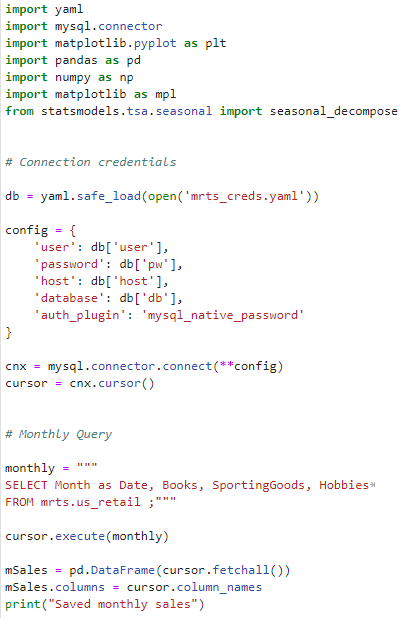   
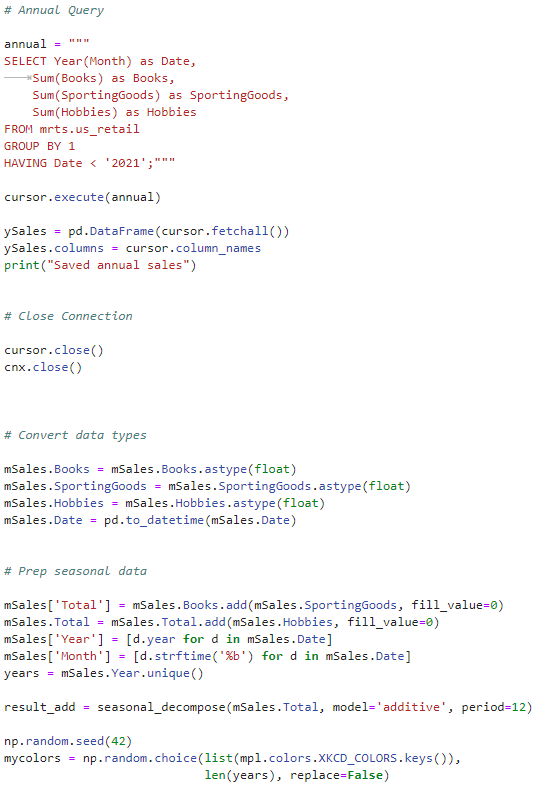  
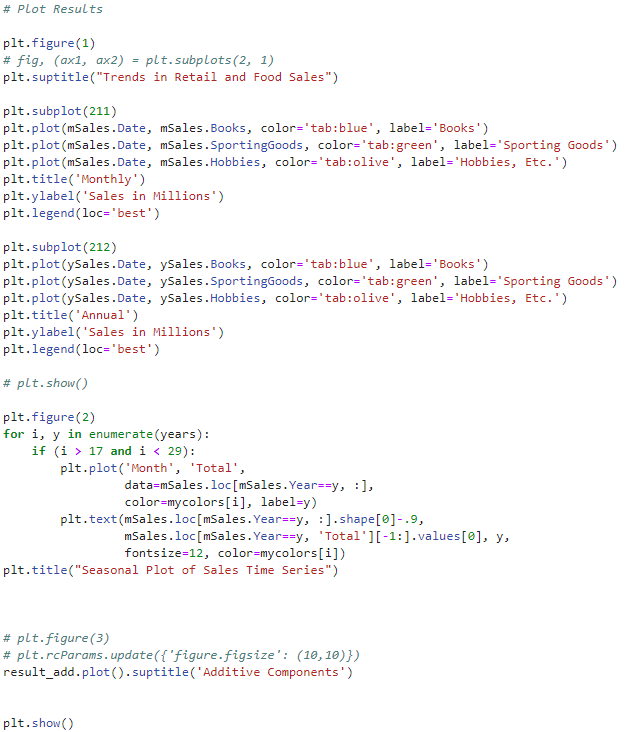

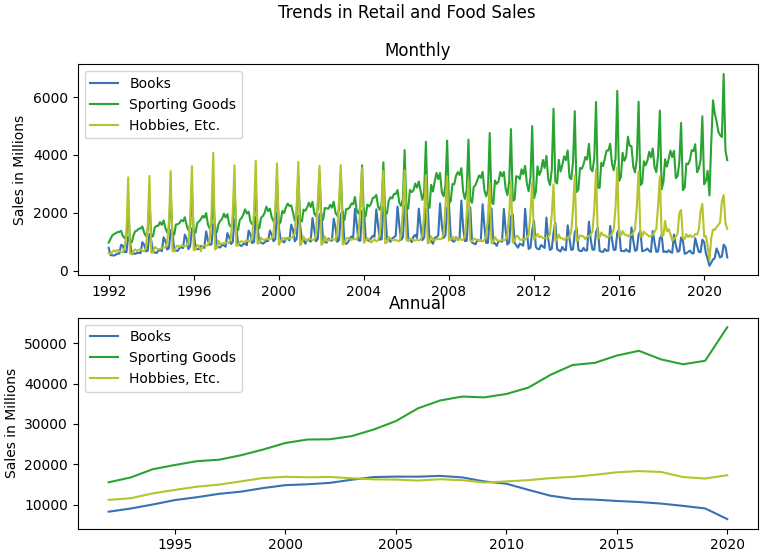

The monthly and annual plots show that sporting goods has the highest upward trend in sales, with the highest starting sales and fastest growth. However, these trends are much more clear in the annual data due to the seasonal fluctuations. In the annual plot, an increase in sporting goods and hobbies sales and a decrease in bookstore sales are visible.

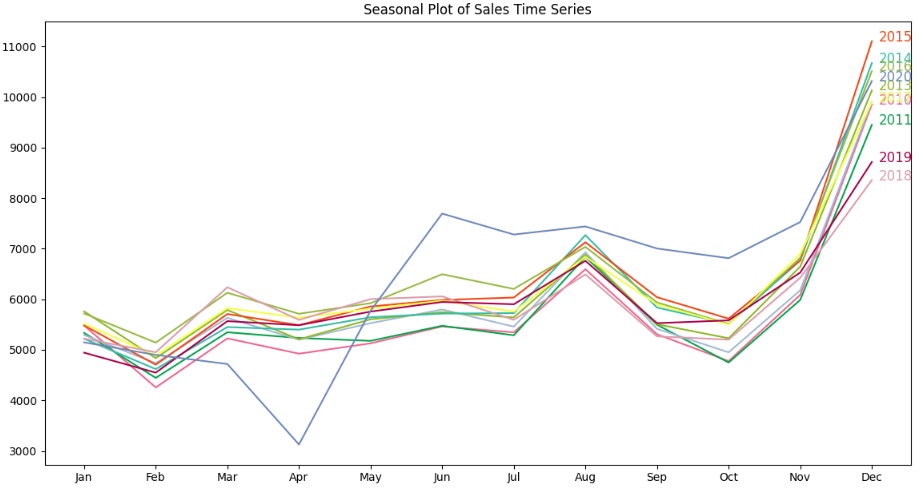

The seasonal trends are more clearly visible when overlaying monthly sales from each year. In most years, sales drop in February and October, with a sharp increase in December each year. The seasonality shifted in 2020, likely due to the impact of the global pandemic, as sales dropped sharply in April 2020 before increasing to higher totals than normal for the rest of the year.

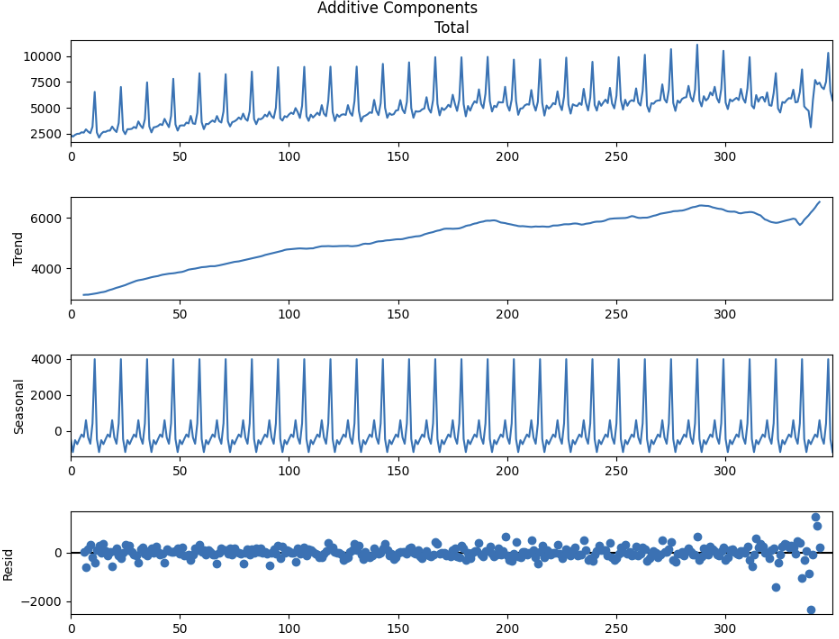

The decomposition of the elements of the time series for the total sales of these industries is consistent with the prior plots. The overall trend increases very consistently until the last year, 2020. The season fluctuations of sharp increases in December are clearly visible in the seasonal plot.

[Back to top](#Index)

### 3.4 Explore Percentage Change

Additional queries were run against the MRTS database to compare the percent composition of clothing and to compare the percent changes in all clothing store sales, women's clothing store sales, and men's clothing store sales.

In economics, the percentage change is used to compare trends between categories while minimizing the effect of different scales and base values. For example, net profits are often much lower than gross revenues after accounting for expenses. Comparing the two dollar amounts could minimize changes in profits due to the lower base dollar amounts.

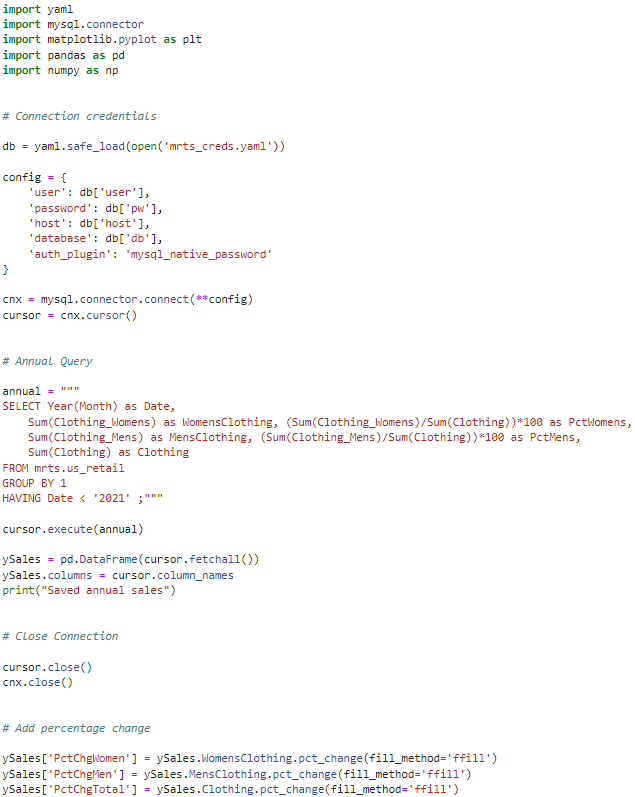  
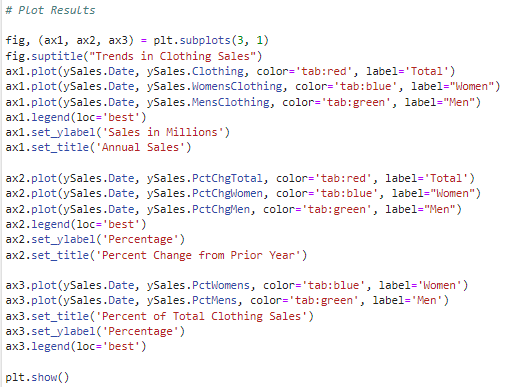

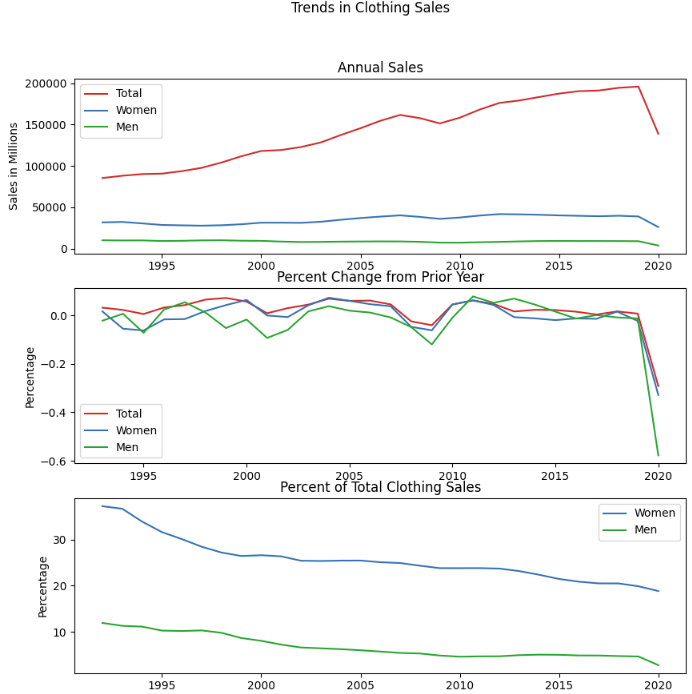

Women's clothing stores consistently have higher sales than men's clothing stores. Women's clothing stores also have a much large percentage of contribution to total clothing store sales, although this share decreased from over 30 percent to approximately 20 percent from 1992 through 2020. The percentage of contribution to total clothing store sales from men's clothing stores also decreased over this period from over 10 percent in 1992 to less than 5 percent in 2020. While the total sales differ, women's clothing stores, men's clothing stores, and the total of all clothing stores had very similar percentage changes throughout this period, although men's clothing stores experienced a much larger percentage drop in 2020 than the other categories.

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

Additional queries were run against the MRTS database to compare the monthly and annual sales and rolling averages for new car dealers, used car dealers, and gas stations.


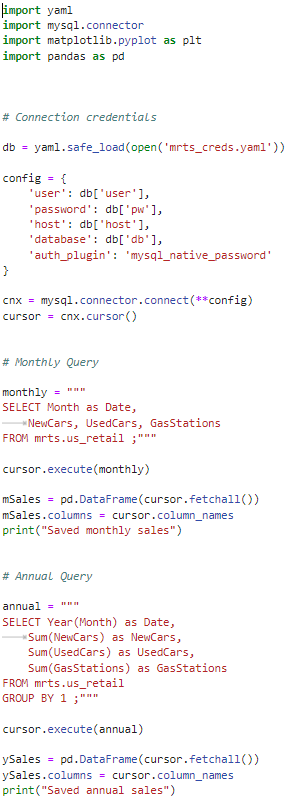  
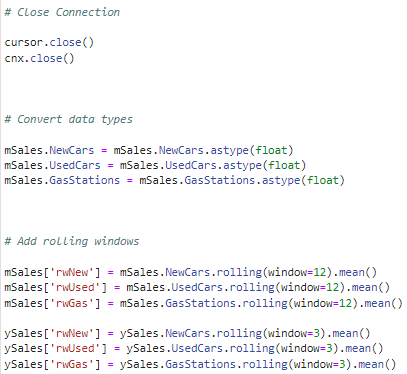  
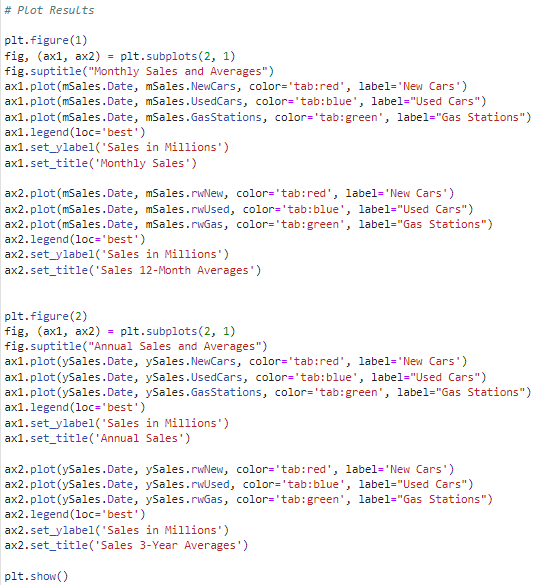

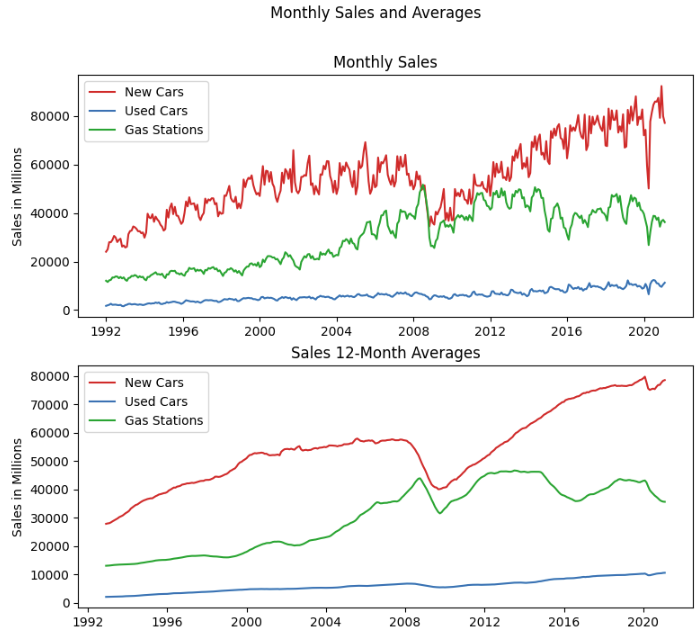  
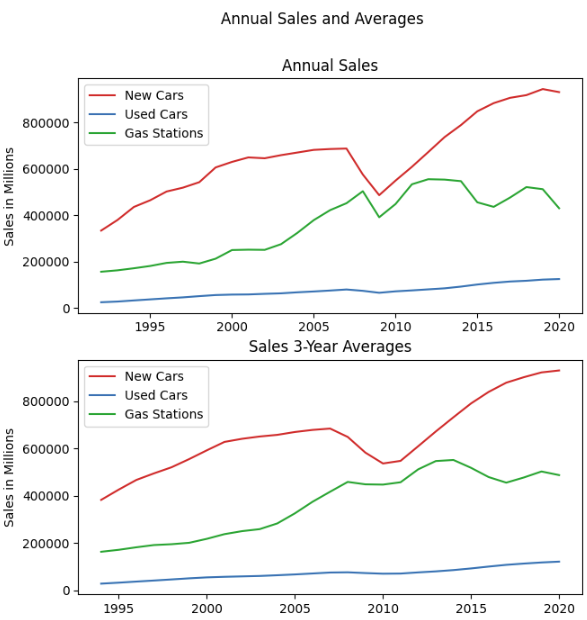

A rolling time window indicates that a moving average has been calculated for each observation in a time series, with each average using only observations within a certain number of months set by the analyst. Rolling averages can help to reveal trends and the overall level of stability in the series if significant volatility remains after accounting for seasonality.

For example, the total monthly sales for new car dealers, used car dealers, and gas stations are hard to assess visually due to the significant seasonal fluctuations. Using the rolling average of each 12 months shows clear overall trends in the data. The monthly rolling average plot shows that trends in the sales of new car dealers follow gas station sales more closely the sales of used car dealers. Using the rolling average of each 3 years further smooths the data to display more of the long-term trends rather than individual economic impacts in each year.

[Back to top](#Index)

## Conclusion

Used car dealers seem likely to attract the least spending, as these sales trailed new car dealers and gas station sales throughout the entire period from 1992 through 2020.

New car dealers seem likely to attract the most spending, and increased throughout the 2010s, even as gas station sales temporarily decreased and leveld off.





[Back to top](#Index
)
## References

Add all references you used to complete this project.

- "API reference." Pandas. Accessed February 13, 2023. https://pandas.pydata.org/docs/reference/index.html

- "Time Series Analysis in Python – A Comprehensive Guide with Examples." Machine Learning Plus. Accessed February 13, 2023. https://www.machinelearningplus.com/time-series/time-series-analysis-python/

- "Time Series Analysis: The Basics." Australian Bureau of Statistics. Accessed February 13, 2023. https://www.abs.gov.au/websitedbs/D3310114.nsf/home/Time+Series+Analysis:+The+Basics

- "Why does BEA publish percent changes in quarterly series at annual rates?" U.S. Department of Commerce, Bureau of Economic Analysis. Accessed February 13, 2023. https://www.bea.gov/help/faq/122

- "Smoothing Data with Moving Averages." Federal Reserve Bank of Dallas. Accessed February 13, 2023. https://www.dallasfed.org/research/basics/moving
